## Интеллектуальный анализ данных – весна 2023
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
if np.isnan(y).sum() == 0 & X.isnull().sum().sum() == 0:
    print('No missing values')
else:
    print('Missing values detected')

if (X.dtypes == 'object').sum() == 0:
    print('No categorical data')
else:
    print('Categorical data detected')

No missing values
No categorical data


**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split

np.random.seed(0)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=10)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [6]:
normalizer = StandardScaler()

X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.fit_transform(X_test)

X_new_train = pd.DataFrame(data=X_train_normalized, columns=X_train.columns)
X_new_test = pd.DataFrame(data=X_test_normalized, columns=X_test.columns)

In [7]:
X_train_with_two_features = X_new_train[['alcohol', 'magnesium']]
X_test_with_two_features = X_new_test[['alcohol','magnesium']]

neighbours = [1, 3, 5, 10, 15, 25]
classifiers = []

print('NN\t\tTrain\t\tTest')

for neighbour in neighbours:
    model = KNeighborsClassifier(
        n_neighbors=neighbour,
        n_jobs = 5,
        metric='euclidean'
    ).fit(X_train_with_two_features, Y_train)

    classifiers.append(model)

    prediction_on_train = model.predict(X_train_with_two_features)
    prediction_on_test = model.predict(X_test_with_two_features)

    accuracy_on_train = accuracy_score(Y_train, prediction_on_train)
    accuracy_on_test = accuracy_score(Y_test, prediction_on_test)

    print(f'{neighbour}\t\t{round(accuracy_on_train, 3)}\t\t{round(accuracy_on_test, 3)}')

NN		Train		Test
1		0.992		0.648
3		0.782		0.648
5		0.766		0.704
10		0.726		0.537
15		0.726		0.574
25		0.718		0.611


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [8]:
!pip install mlxtend


[notice] A new release of pip available: 22.3.1 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [9]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

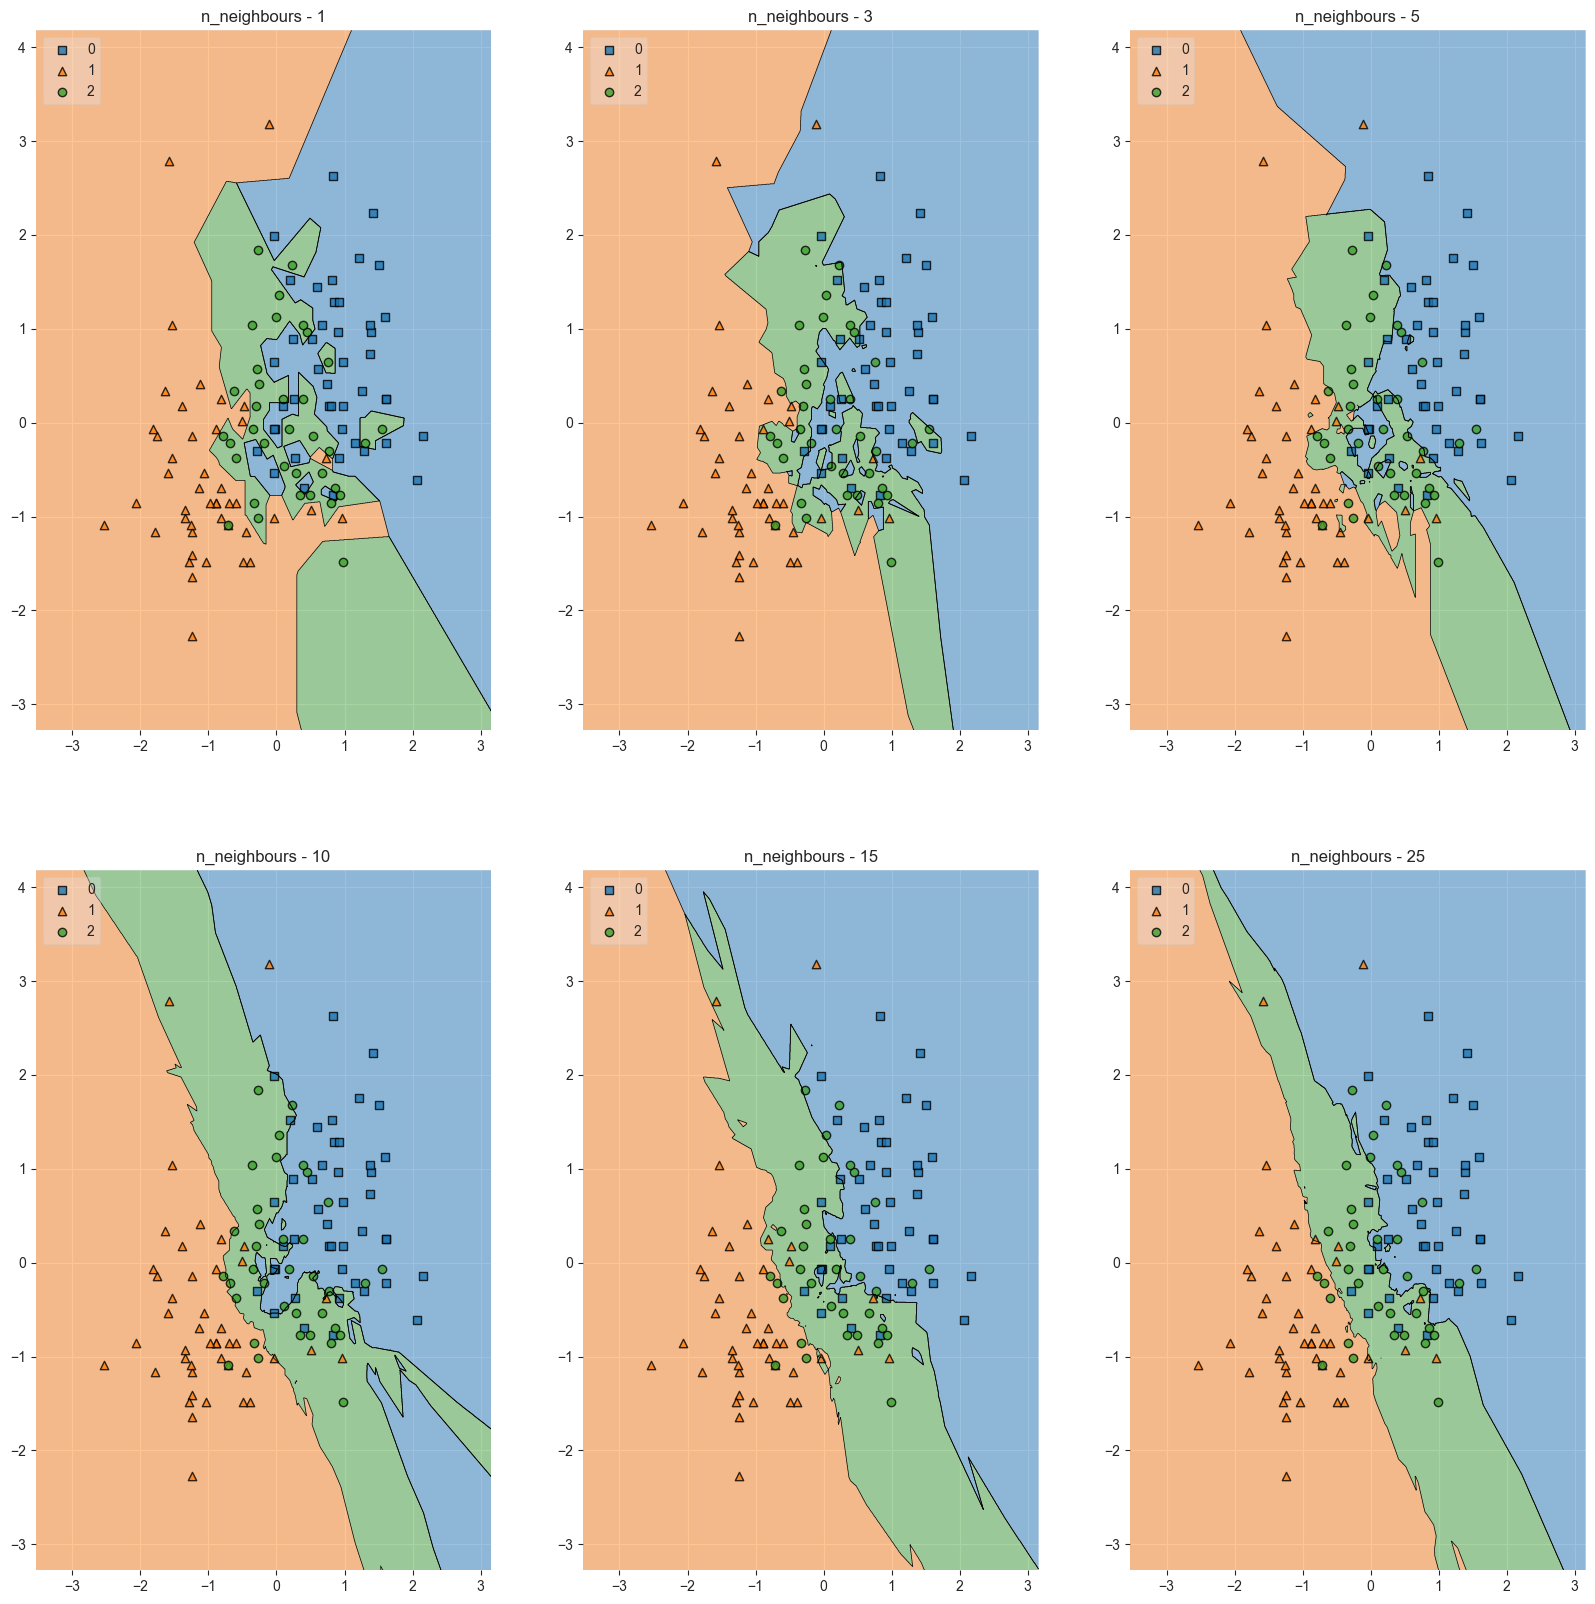

In [244]:
from mlxtend.plotting import plot_decision_regions
from matplotlib import gridspec
import itertools

grid_spec = gridspec.GridSpec(2, 3)

figure = plt.figure(figsize=(20, 20))

labels = [f'n_neighbours - {n}' for n in neighbours]

for classifier, label, grid in zip(classifiers, labels, itertools.product([0, 1], [0, 1, 2])):

    classifier.fit(X_train_with_two_features.values, Y_train)
    ax = plt.subplot(grid_spec[grid[0], grid[1]])

    figure = plot_decision_regions(
        X=X_train_with_two_features.values,
        y=Y_train,
        clf=classifier,
        legend=2
    )
    plt.title(label)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

Пойдём от обратного: 10, 15 и 25 соседей точно не подходят. Если посмотреть на зеленую область, то примерно на половине занятой ей площади вообще нет объектов зеленого класса.
Дальше 1 и 3 соседа: можно заметить пару мест, где объекты зеленого класса находятся среди кучи синих. Скорее всего, это просто выбросы, и они не должны учитываться классификатором. Видим обратную ситуацию. Аналогично и для объектов синего цвета, окруженных объектами зеленого цвета.

Остаётся 5 соседей, лично я там особых проблем не вижу :). Плюс, в результатах задачи 1.3 видно, что при 5 соседях accuracy на тестовой выборке выше всего, а разность между accuracy на тренировочной и тестовой выборке меньше всего.

### Задание 2. KNN своими руками. 2 Балла

В данном задании мы попробуем реализовать алгоритм KNN своими руками. В данном случае мы попробуем сделать KNN для классификации.

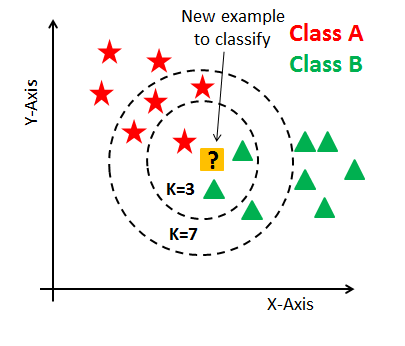

In [16]:
import numpy as np
from collections import Counter
from numpy.linalg import norm

class KNN:
    def __init__(self, k: int):
        self.k = k

    def __euclidean_distance__(
        self,
        point: float,
        dataframe: pd.DataFrame
    ) -> np.array:
        return np.sqrt(
            np.sum(
                a=(point - dataframe)**2,
                axis=1
            )
        )

    def __most_frequent__(self, list: list):
        return max(list, key=list.count)
    
    def fit(self, X: pd.DataFrame, y: pd.DataFrame):
        self.X_train = X
        self.Y_train = y

    def predict(self, X_test: pd.DataFrame):
        neighbours = []

        for element in X_test:
            euclidean_distances = self.__euclidean_distance__(element, self.X_train)

            # sort classes by distance to current element (using zip for consistent sorting)
            sorted_distances = sorted(zip(euclidean_distances, self.Y_train))

            # get only classes
            classes_according_to_distance = [_class for _, _class in sorted_distances]

            # get k nearest neighbours
            neighbours.append(classes_according_to_distance[:self.k])

        # get the most frequent class among neighbours of each point
        result = [self.__most_frequent__(point_neighbours) for point_neighbours in neighbours]

        return np.array(result)

In [17]:
# Не меняйте файл!
def test_knn(KNN):
  knn = KNN(k=1)
  X_train =  np.array([[1, 1], [2, 2]])
  y_train =  np.array([0, 1])
  X_test =  np.array([[1.5, 1.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [0]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[9.5, 9.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5.5, 5.5]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[15, 15]])
  knn.fit(X_train, y_train)
  assert knn.predict(X_test) == [1]

  knn = KNN(k=3)
  X_train = np.array([[1, 1], [2, 2], [3, 3], [4, 4], [5, 5], [6, 6], [7, 7], [8, 8], [9, 9], [10, 10]])
  y_train = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])
  X_test = np.array([[5, 5], [2, 2]])
  knn.fit(X_train, y_train)
  assert all(knn.predict(X_test) == [1, 0])

In [18]:
# Если тесты эти пройдены, то все верно!
test_knn(KNN)

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [19]:
data = pd.read_csv('data/diamonds.csv', index_col=0)
data.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [20]:
if data.isnull().sum().sum() == 0:
    print('No missing values')
else:
    print('Missing values detected')

No missing values


**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

Мне кажется, что столбы `x`, `y`, `z` бессмысленны, так как есть `depth`, который выражается через них, соответственно, эти столбцы напрямую не влияют на цену

In [21]:
data = data.drop(['x', 'y', 'z'], axis=1)
data

,carat,cut,color,clarity,depth,table,price
1,0.23,Ideal,E,SI2,61.5,55.0,326
2,0.21,Premium,E,SI1,59.8,61.0,326
3,0.23,Good,E,VS1,56.9,65.0,327
4,0.29,Premium,I,VS2,62.4,58.0,334
5,0.31,Good,J,SI2,63.3,58.0,335
...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757
53937,0.72,Good,D,SI1,63.1,55.0,2757
53938,0.70,Very Good,D,SI1,62.8,60.0,2757
53939,0.86,Premium,H,SI2,61.0,58.0,2757


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [22]:
data.corr(numeric_only=True)

,carat,depth,table,price
carat,1.000000,0.028224,0.181618,0.921591
depth,0.028224,1.000000,-0.295779,-0.010647
table,0.181618,-0.295779,1.000000,0.127134
price,0.921591,-0.010647,0.127134,1.000000


Количество карат сильнее всего коррелирует с ценой

**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [23]:
new_data = pd.get_dummies(
    data=data,
    columns=['cut', 'color', 'clarity'],
    drop_first=True
).copy(deep=True)
new_data

,carat,depth,table,price,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_E,color_F,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,326,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,326,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,327,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,334,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,335,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53936,0.72,60.8,57.0,2757,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.72,63.1,55.0,2757,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.70,62.8,60.0,2757,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53939,0.86,61.0,58.0,2757,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [24]:
X = new_data.drop(
    labels=['price'],
    inplace=False,
    axis=1
)
Y = new_data['price'].copy(deep=True)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=10)

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [25]:
normalizer = StandardScaler()

X_train_normalized = normalizer.fit_transform(X_train)
X_test_normalized = normalizer.fit_transform(X_test)

X_new_train = pd.DataFrame(data=X_train_normalized, columns=X_train.columns)
X_new_test = pd.DataFrame(data=X_test_normalized, columns=X_test.columns)

**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear_regression = LinearRegression().fit(X_new_train, Y_train)

print(f'Train: {mean_squared_error(Y_train, linear_regression.predict(X_new_train))}')
print(f'Test: {mean_squared_error(Y_test, linear_regression.predict(X_new_test))}')

Train: 1326655.2856872592
Test: 1371738.8311518116


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [28]:
coefs_df = pd.DataFrame({'coefs': linear_regression.coef_})
features_df = pd.DataFrame({'features': linear_regression.feature_names_in_})

features_df.join(coefs_df)

,features,coefs
0,carat,4188.383108
1,depth,-38.165973
2,table,-65.328354
3,cut_Good,189.744133
4,cut_Ideal,443.000659
5,cut_Premium,365.655296
6,cut_Very Good,340.721160
7,color_E,-79.728093
8,color_F,-113.861054
9,color_G,-200.943305


`carat` и `clarity` имеют слишком большие веса относительно других признаков

**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [29]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(10).fit(X_new_train, Y_train)
ridge = Ridge(10).fit(X_new_train, Y_train)

print('Lasso:')
print(f'Train: {mean_squared_error(Y_train, lasso.predict(X_new_train))}')
print(f'Test: {mean_squared_error(Y_test, lasso.predict(X_new_test))}\n')

print('Ridge')
print(f'Train: {mean_squared_error(Y_train, ridge.predict(X_new_train))}')
print(f'Test: {mean_squared_error(Y_test, ridge.predict(X_new_test))}')

print('Lasso')
lasso_coefs_df = pd.DataFrame({'coefs': lasso.coef_})
lasso_features_df = pd.DataFrame({'features': lasso.feature_names_in_})

display(lasso_features_df.join(lasso_coefs_df))

print('Ridge')
ridge_coefs_df = pd.DataFrame({'coefs': ridge.coef_})
ridge_features_df = pd.DataFrame({'features': ridge.feature_names_in_})

display(ridge_features_df.join(ridge_coefs_df))

Lasso:
Train: 1379840.022212759
Test: 1427902.9844801414

Ridge
Train: 1326719.0732929131
Test: 1371778.6999328728
Lasso


,features,coefs
0,carat,4128.695598
1,depth,-70.600754
2,table,-74.750491
3,cut_Good,60.299473
4,cut_Ideal,228.955935
5,cut_Premium,169.872794
6,cut_Very Good,160.961901
7,color_E,-8.477073
8,color_F,-43.169713
9,color_G,-118.295979


Ridge


,features,coefs
0,carat,4185.667697
1,depth,-38.879749
2,table,-65.561514
3,cut_Good,189.850287
4,cut_Ideal,443.231056
5,cut_Premium,365.800570
6,cut_Very Good,341.098918
7,color_E,-79.306727
8,color_F,-113.362381
9,color_G,-200.112414


`Ridge` практически не изменил изначальные веса, а `Lasso`, наоборот, привел практически все веса к одному порядку. В принципе, судя по тому, насколько сильно уменьшились веса в `Lasso-регрессии`, проблема мультиколлинеарности проявлялась достаточно сильно :)

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

In [30]:
from numpy.linalg import norm

alphas = [0.1, 1, 10, 100, 200]

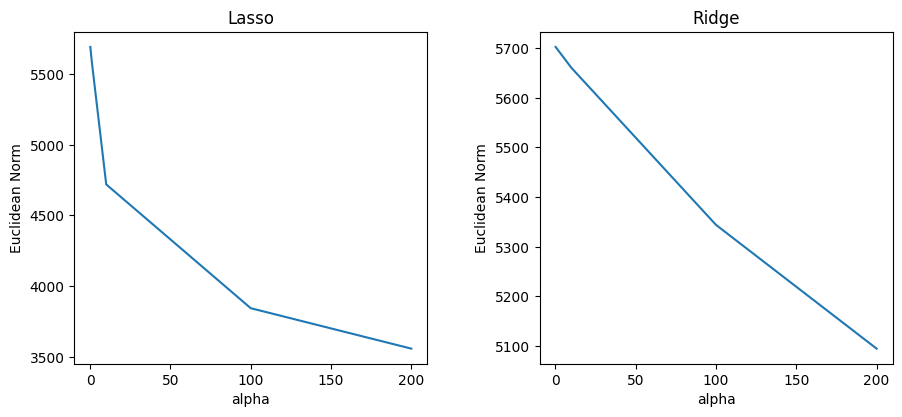

In [31]:
lasso_norm = []
ridge_norm = []

for alpha in alphas:
    lasso = Lasso(alpha).fit(X_new_train, Y_train)
    ridge = Ridge(alpha).fit(X_new_train, Y_train)

    lasso_norm.append(norm(lasso.coef_))
    ridge_norm.append(norm(ridge.coef_))

figure, (ax1, ax2) = plt.subplots(1, 2)
figure.set_size_inches(10, 5)
figure.tight_layout(pad=5)

ax1.plot(alphas, lasso_norm)
ax1.set_title('Lasso')
ax1.set_xlabel('alpha')
ax1.set_ylabel('Euclidean Norm')


ax2.plot(alphas, ridge_norm)
ax2.set_title('Ridge')
ax2.set_xlabel('alpha')
ax2.set_ylabel('Euclidean Norm');

Несложно заметить, что `Lasso` уменьшает веса агрессивнее. Из-за этого её используют для отбора признаков: через агрессивное изменение весов `Lasso` изменяет важность признаков для модели

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [32]:
from sklearn.linear_model import LassoCV

cv = 5
lasso_cv = LassoCV(alphas=alphas, cv=cv).fit(X_new_train, Y_train)

alphas_df = pd.DataFrame({'alphas': lasso_cv.alphas_})
mse_df = pd.DataFrame({'mse_mean': lasso_cv.mse_path_.mean(axis=1)})

alphas_df.join(mse_df)

,alphas,mse_mean
0,200.0,2.132184e+06
1,100.0,1.765763e+06
2,10.0,1.382153e+06
3,1.0,1.329279e+06
4,0.1,1.328752e+06


При $\alpha$ = 0.1 ошибка наименьшая -> качество наибольшее

**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [34]:
alpha = 0.1

lasso_regression = Lasso(alpha).fit(X_new_train, Y_train)
model_coefs_df = pd.DataFrame({'coefs': lasso_regression.coef_})
model_features_df = pd.DataFrame({'features': lasso_regression.feature_names_in_})

model_coefs_df.join(model_features_df)

,coefs,features
0,4187.782567,carat
1,-38.490215,depth
2,-65.421598,table
3,188.463478,cut_Good
4,440.885400,cut_Ideal
5,363.718450,cut_Premium
6,338.944531,cut_Very Good
7,-79.015977,color_E
8,-113.154652,color_F
9,-200.116909,color_G


Наиболее информативными признаками оказались - `carat` и `clarity`. Думаю, из-за того, что крупные бриллианты всегда более редкие, чем мелкие, поэтому это сильно влияет на цену. Аналогично и с чистотой: чем бриллиант чище, тем сильнее он будет искриться и сверкать. Очень чистые бриллианты тоже очень редкие, поэтому дорогие

Наиболее неинформативными признаками оказались `depth` и `table`. Тут честно непонятно, потому что глубина и площадка показывают качество огранки... Может быть смысл в том, что природные качества более важны, а может, тут просто данные из очень хорошей мастерской, где все огранщики профессионалы, и качество огранки всегда крутое :)

**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [35]:
linear_predict = linear_regression.predict(X_new_test)
lasso_predict = lasso_regression.predict(X_new_test)

print(f'Linear: {mean_squared_error(Y_test, linear_predict)}')
print(f'Lasso: {mean_squared_error(Y_test, lasso_predict)}')

Linear: 1371738.8311518116
Lasso: 1371674.3060012546


Даже не знаю, что сказать...
У Лассо-регрессии mse незначительно меньше, поэтому её лучше использовать для предсказаний. Думаю, это связано с тем, что Лассо-регрессия выделяет наиболее важные признаки за счёт L1 регуляризации, поэтому предсказания будут более точными.